### **Spam or Ham** messages detection

**1. Import libraries**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap

from sklearn import metrics


**2. Read Data**

In [2]:
df = pd.read_csv('spam.csv')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**3. Count value of Spam and Ham (v1)**

In [3]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

**4. See all infomation**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


**5. Drop columns Unnamed**

In [5]:
#check missing values
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
#drop columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**6. Rename colomns**

In [7]:
df = df.rename(columns={'v1': 'Category', 'v2': 'message'})

**7. Change category to the binary values: target on Spam**

In [82]:
#df = df.copy()
#df['Spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)
#df.head()

### Data Exploration

**8. Visualize the graph of each category**

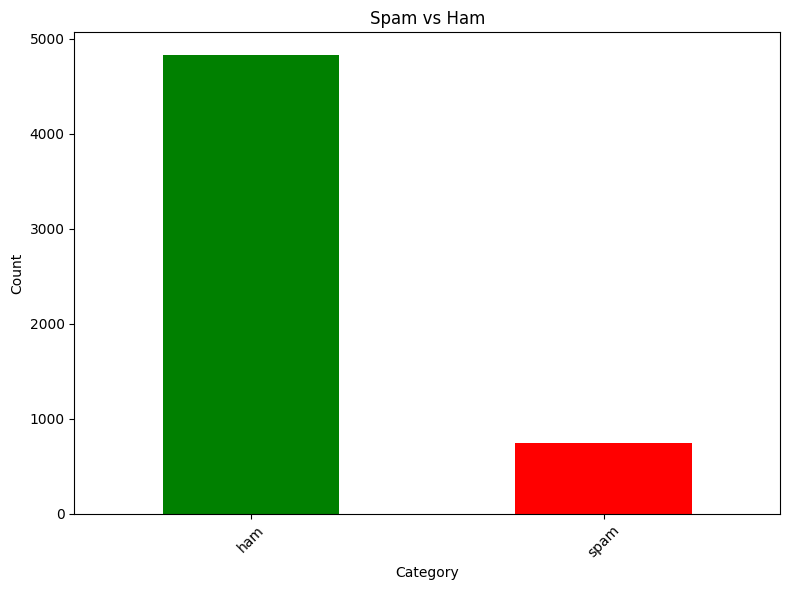

In [8]:
value_counts = df['Category'].value_counts()

#plot bar graph
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color=['green', 'red'])

#Add labels and title
plt.title('Spam vs Ham')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Data Preprocessing

In [84]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

**9. Cleaning text**

In [9]:
#sample before cleaning
print("\033[1m\u001b[45;1m The First 5 Texts:\033[0m",*df["message"][:5],sep="\n")

 The First 5 Texts:
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though


In [10]:
# cleaning text function
def clean(message):
  sms = re.sub("[^a-zA-Z0-9]", " ", message)
  sms = sms.lower()  #converting to lowercase
  sms = sms.split()
  sms = ' '.join(sms)
  return sms

df["Cleaned_message"] = df["message"].apply(clean)

print("\033[1m\u001b[45;1m The First 5 Texts:\033[0m",*df["Cleaned_message"][:5],sep="\n")

 The First 5 Texts:
go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
ok lar joking wif u oni
free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry question std txt rate t c s apply 08452810075over18 s
u dun say so early hor u c already then say
nah i don t think he goes to usf he lives around here though


**10. Tokenization**

Split text into analyzable units.

In [11]:
df["Tokenize_text"] = df.apply(lambda row: nltk.word_tokenize(row["Cleaned_message"]), axis=1)
print("\033[1m\u001b[45;1m The First 5 Texts:\033[0m",*df["Tokenize_text"][:5],sep="\n")

 The First 5 Texts:
['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'in', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', 'to', '87121', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', 'c', 's', 'apply', '08452810075over18', 's']
['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say']
['nah', 'i', 'don', 't', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though']


**11. Removing stopwords**

Eliminate filler words.

In [88]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# remove stopword function
def remove_stopwords(message):
  stop_words = set(stopwords.words("english"))
  filtered_words = [word for word in message if word not in stop_words]
  return filtered_words

df["Filtered_text"] = df["Tokenize_text"].apply(remove_stopwords)
print("\033[1m\u001b[45;1m The First 5 Texts:\033[0m",*df["Filtered_text"][:5],sep="\n")

 The First 5 Texts:
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', '87121', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply', '08452810075over18']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'goes', 'usf', 'lives', 'around', 'though']


**12. Lemmatization**

Convert words to their base form.  However, the difference is that lemmatization ensures that the root word belongs to the language one is dealing with, in our case it is English.

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
lemmatizer = WordNetLemmatizer()

#define lemmatize string
def lemmatize_string(message):
  lemmatized_words = [lemmatizer.lemmatize(word) for word in message]
  return lemmatized_words

df["Lemmatized_text"] = df["Filtered_text"].apply(lemmatize_string)
print("\033[1m\u001b[45;1m The First 5 Texts after lemitization:\033[0m",*df["Lemmatized_text"][:5],sep="\n")

 The First 5 Texts after lemitization:
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', '87121', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply', '08452810075over18']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'go', 'usf', 'life', 'around', 'though']


**13. Feature Engineering**

* Num_characters: Number of characters in text message

* Num_words: Number of words in text message

* Num_sentence: Number of sentences in text message

These new features are used to **understand the data distribution** and detect hidden patterns between spam and ham.

In [14]:
df["Num_characters"] = df["message"].apply(len)
df["Num_words"] = df.apply(lambda row: nltk.word_tokenize(row["message"]), axis=1).apply(len)
df["Num_sentences"] = df.apply(lambda row: nltk.sent_tokenize(row["message"]), axis=1).apply(len)

df[['Num_characters','Num_words', 'Num_sentences']].describe().T

,count,mean,std,min,25%,50%,75%,max
Num_characters,5572.0,80.058686,59.624385,2.0,36.0,61.0,121.0,910.0
Num_words,5572.0,18.700826,13.743217,1.0,9.0,15.0,27.0,220.0
Num_sentences,5572.0,1.997846,1.522285,1.0,1.0,2.0,2.0,38.0


* **Pair plot**

<Figure size 1000x800 with 0 Axes>

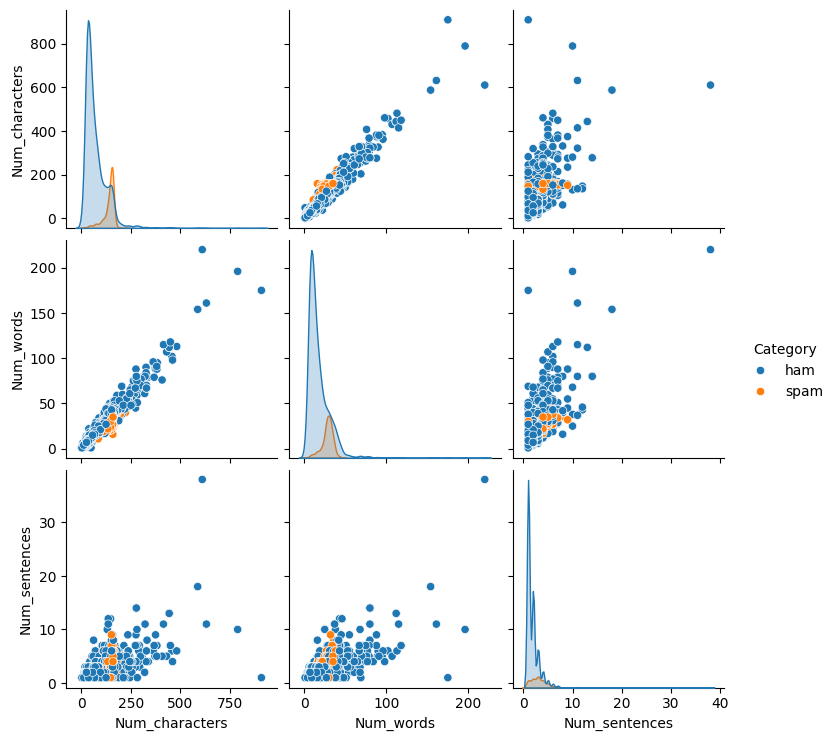

In [15]:
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='Category')
plt.show()

**14. Check Outliers**

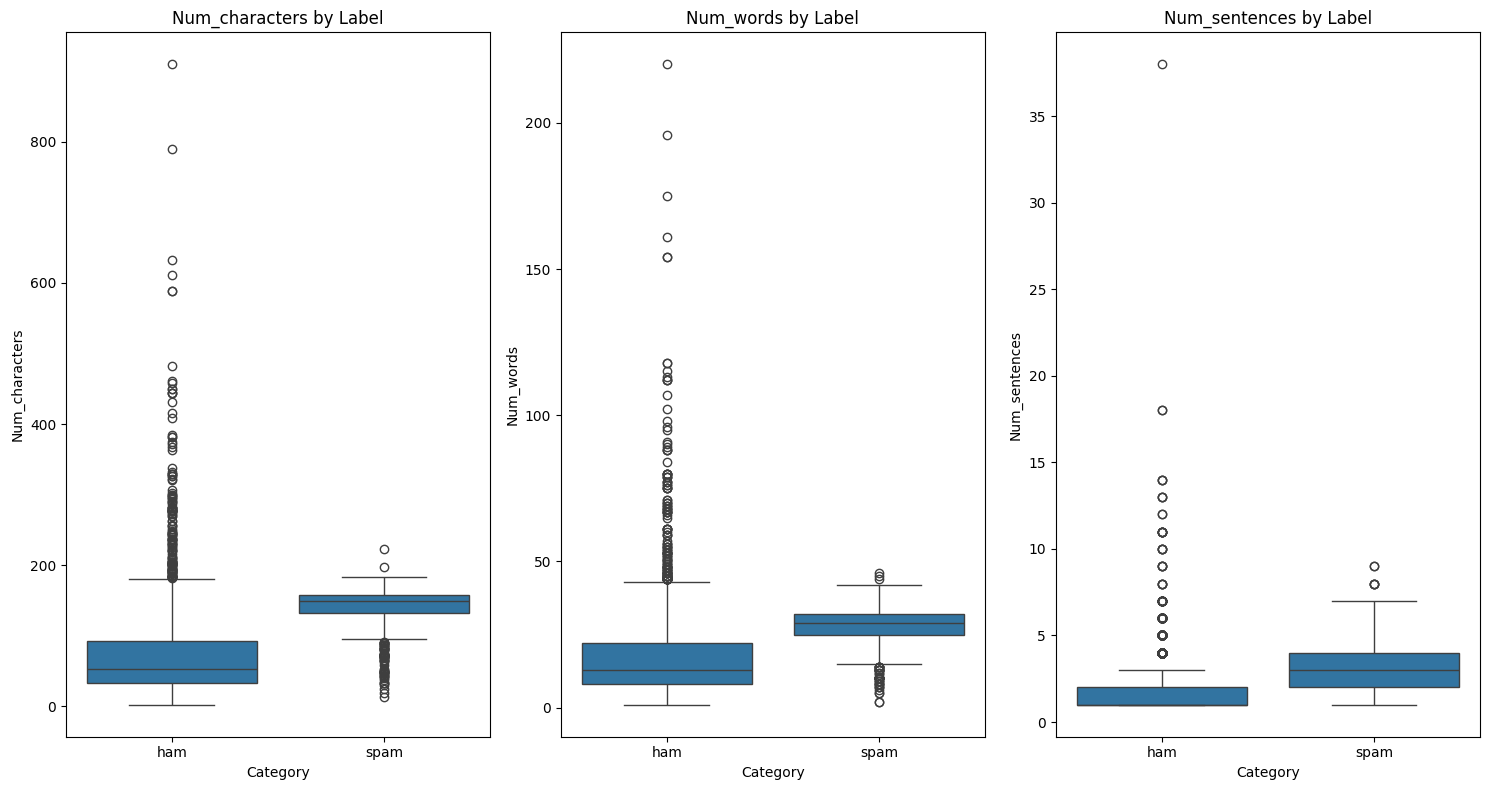

In [16]:
plt.figure(figsize=(15, 8))

# By Category for Num_characters
plt.subplot(1, 3, 1)
sns.boxplot(x="Category", y="Num_characters", data=df)
plt.title("Num_characters by Label")

# By Category for Num_words
plt.subplot(1, 3, 2)
sns.boxplot(x="Category", y="Num_words", data=df)
plt.title("Num_words by Label")

# By Category for Num_sentences
plt.subplot(1, 3, 3)
sns.boxplot(x="Category", y="Num_sentences", data=df)
plt.title("Num_sentences by Label")

plt.tight_layout()
plt.show()


**15. Drop Outliers**

In [17]:
#flag data to prevent from lossing important data.
df['is_long_msg'] = df['Num_characters'] > 350

df.shape

(5572, 10)

* **New pair plot**

<Figure size 1000x800 with 0 Axes>

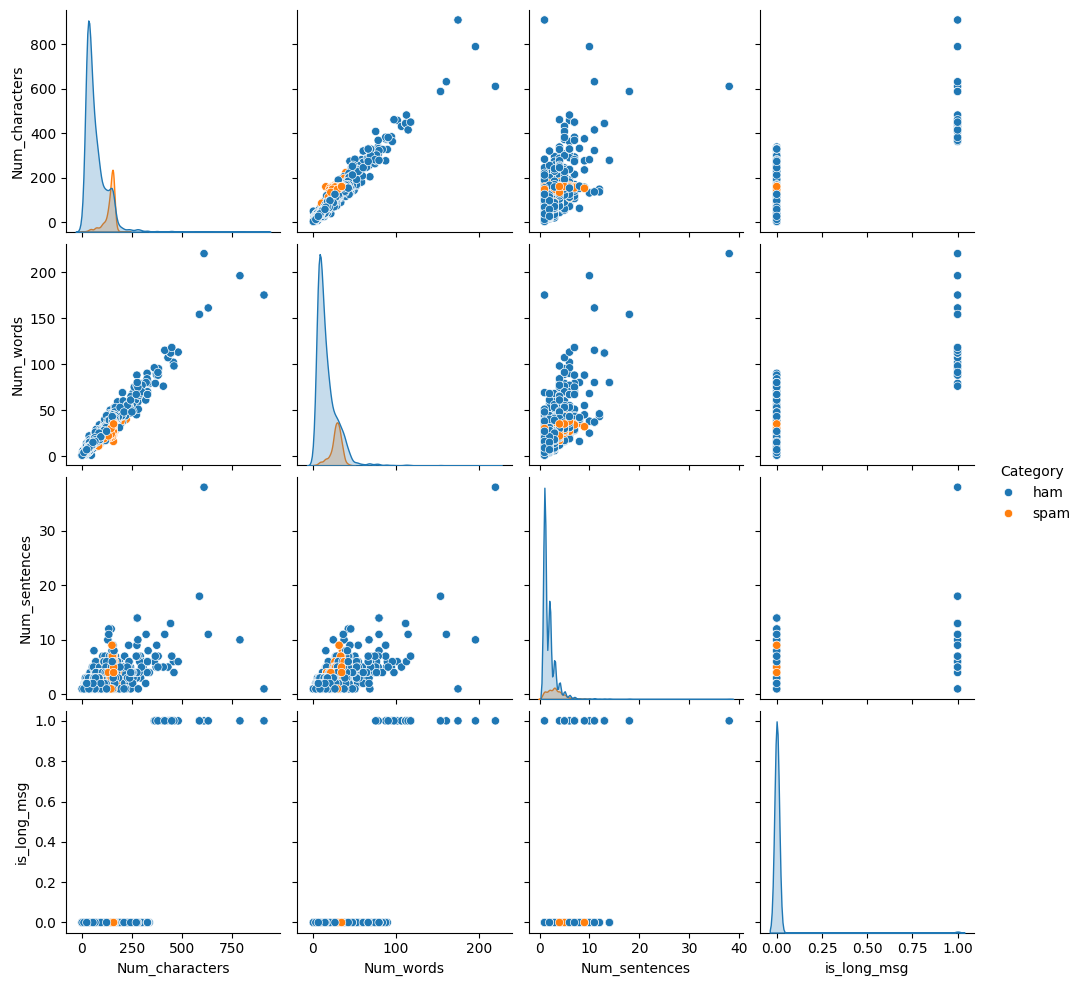

In [18]:
plt.figure(figsize=(10, 8))
fg = sns.pairplot(df, hue='Category')
plt.show(fg)

**15. Vectorization**

Convert text into numerical format so models can understand it.

Steps in the Vectorizing:

* Create a corpus of lemmatized text

* Converting the corpus in vector form

* Label Encoding the classes in target message


In [19]:
#create a corpus of lemmatized text
corpus =[]
for i in df['Lemmatized_text']:
  msg = ' '.join([row for row in i])
  corpus.append(msg)

corpus[:5]
print(print("\033[1m\u001b[45;1m The First 5 lines in corpus:\033[0m",*corpus[:5],sep="\n"))

 The First 5 lines in corpus:
go jurong point crazy available bugis n great world la e buffet cine got amore wat
ok lar joking wif u oni
free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate c apply 08452810075over18
u dun say early hor u c already say
nah think go usf life around though
None


In [20]:
# converting the corpus in vector form
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(corpus).toarray()
X.dtype

dtype('float64')

In [21]:
#Label Encoding the classes in Message
label_encoder  = LabelEncoder()
df["message"] = label_encoder.fit_transform(df["message"])
df.head()

,Category,message,Cleaned_message,Tokenize_text,Filtered_text,Lemmatized_text,Num_characters,Num_words,Num_sentences,is_long_msg
0,ham,1079,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n...",111,24,2,False
1,ham,3101,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]",29,8,2,False
2,spam,1000,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",155,37,2,False
3,ham,4088,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]",49,13,1,False
4,ham,2757,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]","[nah, think, go, usf, life, around, though]",61,15,1,False


### Class Imbalance

**16. Resampling the Dataset**

In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, df["Category"])

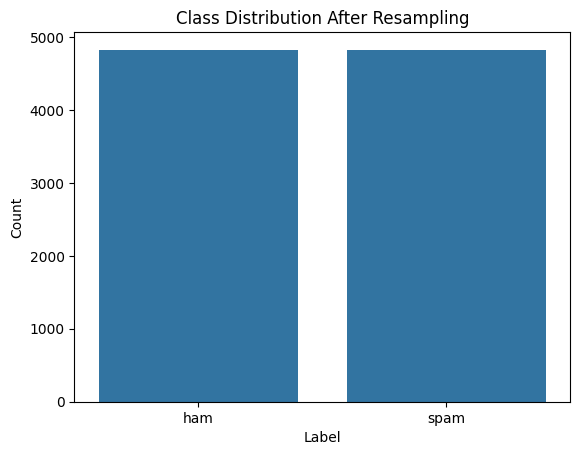

In [23]:
# After resampling
resampled_df = pd.DataFrame({"label": y_resampled})

sns.countplot(x="label", data=resampled_df)
plt.title("Class Distribution After Resampling")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

**17. Split into Train and Test sets**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


**18. Model Building and Evaluation**

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [26]:
algorithm = ['KNeighborsClassifier',
             'RandomForestClassifier',
             'DecisionTreeClassifier',
             'MultinomialNB',
             'LogisticRegression']
Accuracy=[]

def all(model):
    model.fit(X_train, y_train)
    predict = model.predict(X_test)

    acc=accuracy_score(y_test, predict)
    Accuracy.append(acc)

    #Confusion matrix without Normalization
    print('Confusion matrix')

    #Calculating confusion matrix
    cm = confusion_matrix(y_test, predict)

    #Plotting confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap=['lightsteelblue','navajowhite'])
    plt.title('Confusion Matrix', fontsize=16)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

    #confusion matrix with normalization
    print('Confusion matrix with normalization')
    #Calculating confusion matrix
    cm1 = confusion_matrix(y_test, predict, normalize='true')

    #Plotting confusion matrix
    sns.heatmap(cm1, annot=True, fmt='.2f', cmap=['lightsteelblue','navajowhite'])
    plt.title('Confusion Matrix with normalization', fontsize=16)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

    #print Confusion matrix, Classification report and accuracy report
    print(cm)
    print(classification_report(y_test, predict))
    print('accuracy_score : ', acc)


Confusion matrix


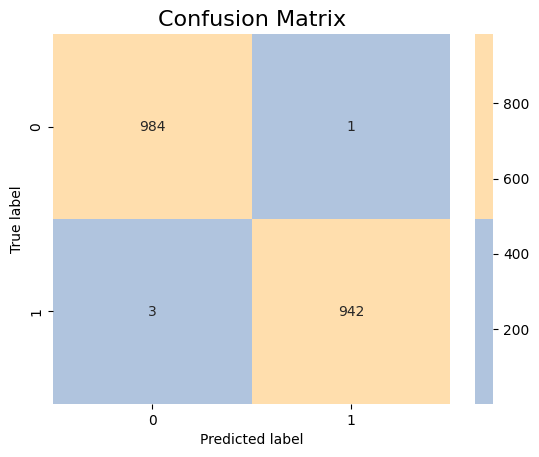

Confusion matrix with normalization


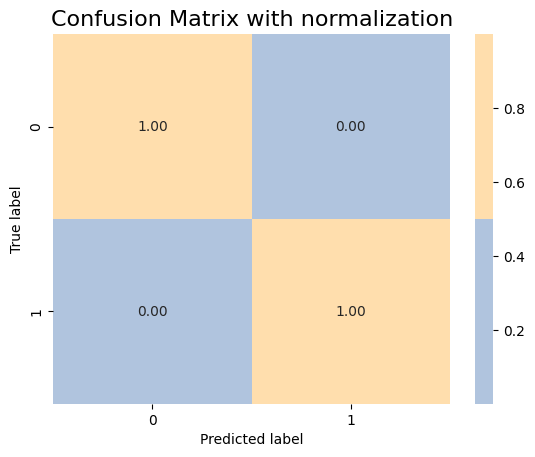

[[984   1]
 [  3 942]]
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00       985
        spam       1.00      1.00      1.00       945

    accuracy                           1.00      1930
   macro avg       1.00      1.00      1.00      1930
weighted avg       1.00      1.00      1.00      1930

accuracy_score :  0.9979274611398964


In [27]:
model_1 = KNeighborsClassifier(n_neighbors=2)
all(model_1)

Confusion matrix


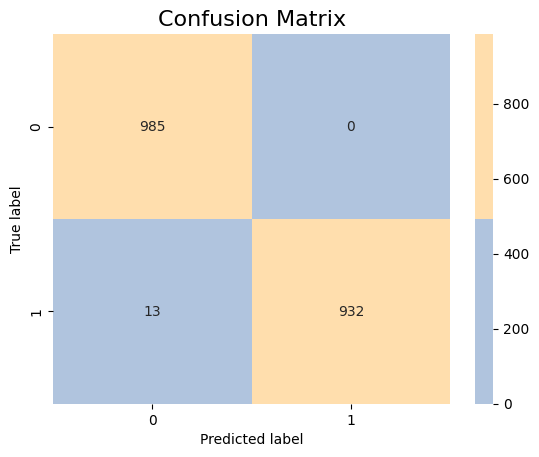

Confusion matrix with normalization


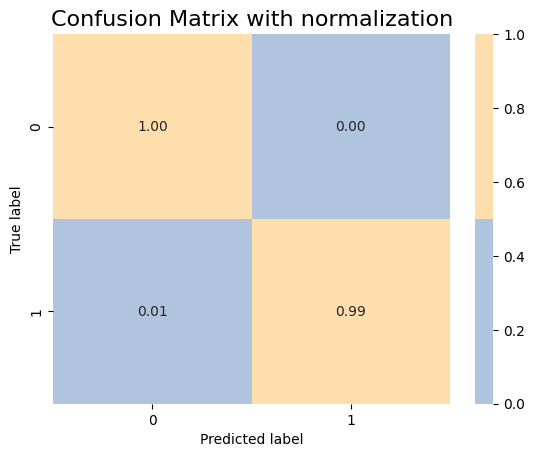

[[985   0]
 [ 13 932]]
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       985
        spam       1.00      0.99      0.99       945

    accuracy                           0.99      1930
   macro avg       0.99      0.99      0.99      1930
weighted avg       0.99      0.99      0.99      1930

accuracy_score :  0.9932642487046632


In [28]:
model_2 = RandomForestClassifier(n_estimators=100, random_state=0)
all(model_2)

Confusion matrix


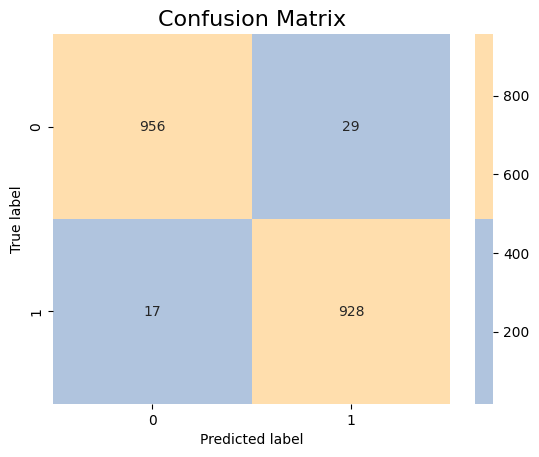

Confusion matrix with normalization


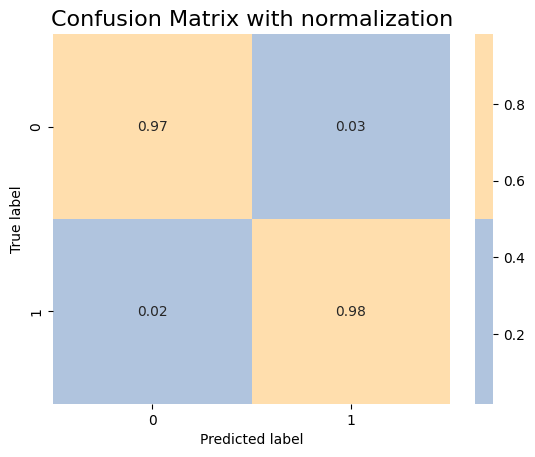

[[956  29]
 [ 17 928]]
              precision    recall  f1-score   support

         ham       0.98      0.97      0.98       985
        spam       0.97      0.98      0.98       945

    accuracy                           0.98      1930
   macro avg       0.98      0.98      0.98      1930
weighted avg       0.98      0.98      0.98      1930

accuracy_score :  0.9761658031088083


In [29]:
model_3 = DecisionTreeClassifier(random_state=42)
all(model_3)

Confusion matrix


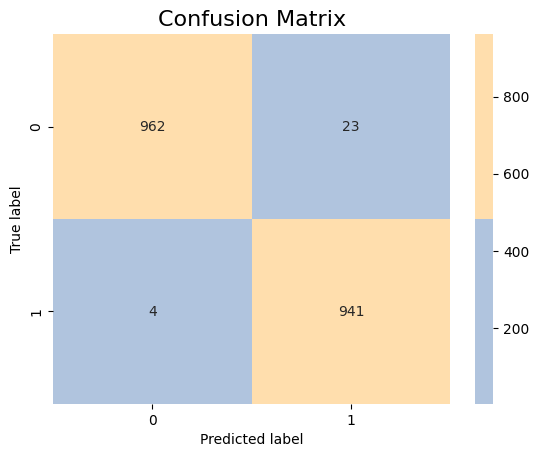

Confusion matrix with normalization


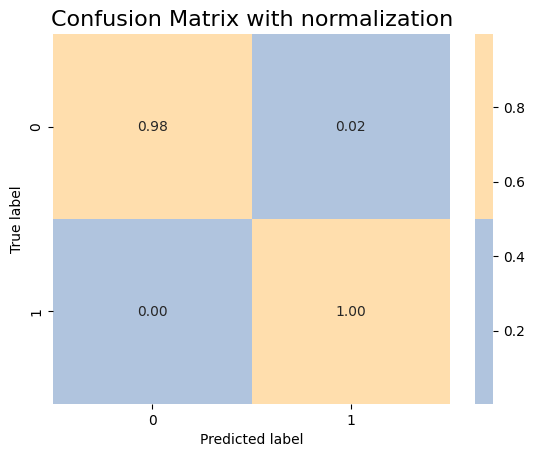

[[962  23]
 [  4 941]]
              precision    recall  f1-score   support

         ham       1.00      0.98      0.99       985
        spam       0.98      1.00      0.99       945

    accuracy                           0.99      1930
   macro avg       0.99      0.99      0.99      1930
weighted avg       0.99      0.99      0.99      1930

accuracy_score :  0.9860103626943005


In [30]:
model_4 = MultinomialNB()
all(model_4)

Confusion matrix


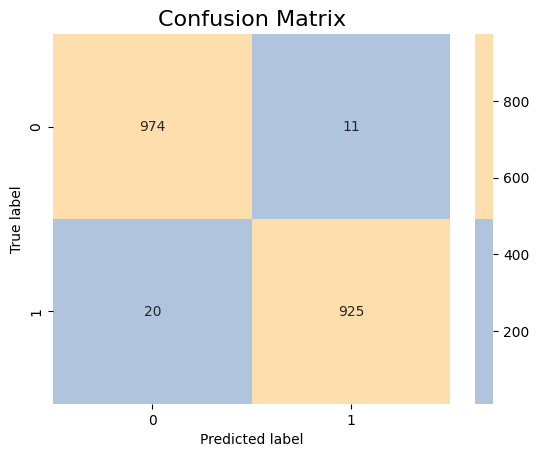

Confusion matrix with normalization


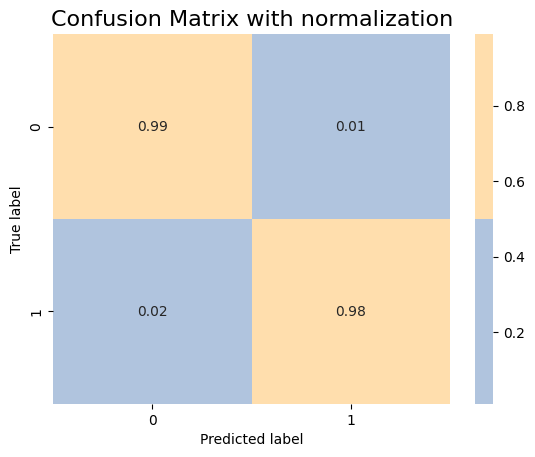

[[974  11]
 [ 20 925]]
              precision    recall  f1-score   support

         ham       0.98      0.99      0.98       985
        spam       0.99      0.98      0.98       945

    accuracy                           0.98      1930
   macro avg       0.98      0.98      0.98      1930
weighted avg       0.98      0.98      0.98      1930

accuracy_score :  0.9839378238341969


In [31]:
model_5 = LogisticRegression()
all(model_5)

**Summary model accuracy**

In [32]:
df = pd.DataFrame({'Algorithm': algorithm, 'Accuracy': Accuracy})
df = df.sort_values(by='Accuracy', ascending=False)
df

,Algorithm,Accuracy
0,KNeighborsClassifier,0.997927
1,RandomForestClassifier,0.993264
3,MultinomialNB,0.986010
4,LogisticRegression,0.983938
2,DecisionTreeClassifier,0.976166


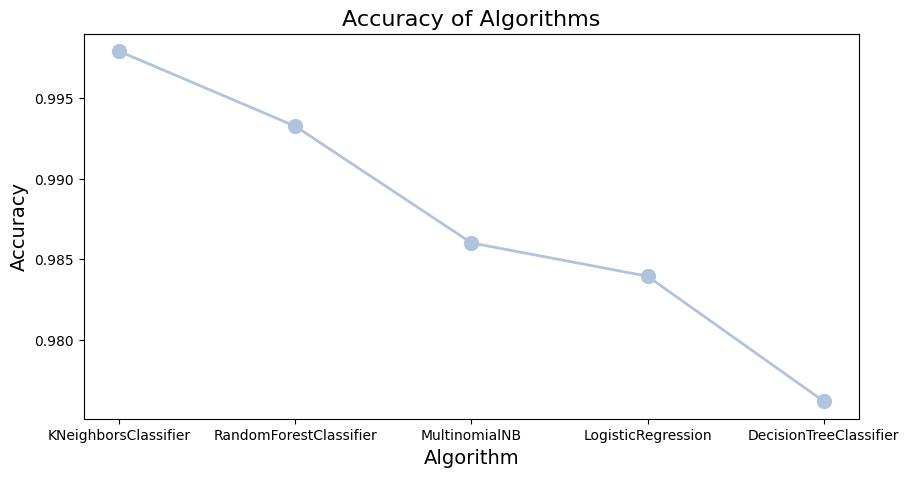

In [33]:
fig = plt.figure(figsize=(10, 5))
plt.plot(df['Algorithm'], df['Accuracy'], marker='o', color='lightsteelblue', markersize=10, linewidth=2)
plt.title('Accuracy of Algorithms', fontsize=16)
plt.xlabel('Algorithm', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()

**19. Prediction for each model**

In [34]:
# Sample text to predict on
sample_text = ["Free entry in 2 a wkly comp to win FA Cup final tickets 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
              "I am gonna be home soon and i dont want to talk about this stuff anymore tonight, k? I've cried enough today.",
              "WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 7 days only."]

# Preprocess the sample text using the same steps as the training data
cleaned_sample = [clean(text) for text in sample_text]
tokenized_sample = [nltk.word_tokenize(text) for text in cleaned_sample]
filtered_sample = [remove_stopwords(text) for text in tokenized_sample]
lemmatized_sample = [" ".join(lemmatize_string(text)) for text in filtered_sample]

# Vectorize the preprocessed sample text
X_sample = tfidf.transform(lemmatized_sample).toarray()

# Make predictions with each model
models = {
    'KNeighborsClassifier': model_1,
    'RandomForestClassifier': model_2,
    'DecisionTreeClassifier': model_3,
    'MultinomialNB': model_4,
    'LogisticRegression': model_5
}

print("\033[1m\u001b[45;1m Predictions for Sample Texts:\033[0m")
for model_name, model in models.items():
    predictions = model.predict(X_sample)
    print(f"\n--- Predictions with {model_name} ---")
    for i, pred in enumerate(predictions):
        print(f"Text {i+1}: '{sample_text[i]}' -> Predicted: {pred}")

 Predictions for Sample Texts:

--- Predictions with KNeighborsClassifier ---
Text 1: 'Free entry in 2 a wkly comp to win FA Cup final tickets 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's' -> Predicted: spam
Text 2: 'I am gonna be home soon and i dont want to talk about this stuff anymore tonight, k? I've cried enough today.' -> Predicted: ham
Text 3: 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 7 days only.' -> Predicted: spam

--- Predictions with RandomForestClassifier ---
Text 1: 'Free entry in 2 a wkly comp to win FA Cup final tickets 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's' -> Predicted: spam
Text 2: 'I am gonna be home soon and i dont want to talk about this stuff anymore tonight, k? I've cried enough today.' -> Predicted: ham
Text 3: 'WINNER!! As a valued networ

**Save the Models**

In [35]:
#from sklearn.pipeline import Pipeline
import joblib

# Initialize models
models = {
    "KNeighborsClassifier": KNeighborsClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "MultinomialNB": MultinomialNB(),
    "LogisticRegression": LogisticRegression()
}

# Train and save each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Replace with your training data
    joblib.dump(model, f"{name}.joblib")

In [36]:
joblib.dump(tfidf, "tfidf_vectorizer.joblib")

['tfidf_vectorizer.joblib']